In [1]:
import pandas as pd

# Gender analysis

In [2]:
df1 = pd.read_csv("data_A_Z.csv")

In [3]:
df2 = pd.read_csv("final4.csv")

In [4]:
df1.columns

Index(['author_name', 'short_id', 'institution', 'share_pct', 'location',
       'repec_institution_id', 'author_url'],
      dtype='object')

In [ ]:
df1.columns

Index(['JEL Subject', 'Title', 'Journal', 'Year', 'Type', 'URL', 'Author(s)',
       'author_name', 'short_id', 'institution', 'share_pct', 'location',
       'repec_institution_id', 'author_url', 'author_std_inst', 'match_type'],
      dtype='object')

In [38]:
import re

def extract_first_name(name):
    if pd.isna(name):
        return None

    name = str(name).strip()

    # Cas "Nom, Prénom(s)"
    if "," in name:
        after_comma = name.split(",", 1)[1]
        tokens = after_comma.strip().split()

        # on garde le premier token "propre"
        for tok in tokens:
            tok_clean = re.sub(r"[^a-zA-Z\-]", "", tok)
            if len(tok_clean) >= 3:
                return tok_clean.lower()
        return None

    # Cas "Prénom Nom"
    tokens = name.split()
    for tok in tokens:
        tok_clean = re.sub(r"[^a-zA-Z\-]", "", tok)
        if len(tok_clean) >= 3:
            return tok_clean.lower()
    return None

In [ ]:
df2["first_name"] = df2["author_name"].apply(extract_first_name)

In [74]:
df1["first_name"] = df1["author_name"].apply(extract_first_name)

In [75]:
df1[["first_name", "author_name"]].head(20)

,first_name,author_name
0,jesper,"Antelius, Jesper"
1,sule,"Alan, Sule"
2,jan,"Antell, Jan Wilhelm"
3,manel,"Antelo, Manel"
4,jean-baptiste,"Antenord, Jean-Baptiste"
5,larbi,"Alaoui, Larbi"
6,rob,"Aalbers, Rob"
7,aino-maija,"Aalto, Aino-Maija"
8,aino-maija,"Aalto, Aino-Maija"
9,michail,"Anthropelos, Michail"


In [76]:
def simplify_first_name(first_name):
    if pd.isna(first_name):
        return None
    # garder le premier prénom si composé
    return first_name.split("-")[0]

df1["first_name_simple"] = df1["first_name"].apply(simplify_first_name)

In [77]:
df1["gender_raw"] = df1["first_name_simple"].apply(
    lambda x: d.get_gender(x) if pd.notna(x) else None
)

In [21]:
pip install gender-guesser

Note: you may need to restart the kernel to use updated packages.


In [50]:
import gender_guesser.detector as gender

d = gender.Detector(case_sensitive=False)

In [78]:
df1["gender_raw"] = df1["first_name"].apply(
    lambda x: d.get_gender(x) if pd.notna(x) else None
)

In [79]:
df1["gender_raw"] = df1["first_name_simple"].apply(
    lambda x: d.get_gender(x) if pd.notna(x) else None
)

In [61]:
df2[["author_name","first_name",  "gender_raw"]]

,author_name,first_name,gender_raw
0,"Nielsen, Steen",steen,male
1,"Paldam, Martin",martin,male
2,"Hylleberg, Svend",svend,male
3,"Strain, Michael R.",michael,male
4,"Batagan, Lorena",lorena,female
...,...,...,...
614475,"Gil-Alana, Luis Alberiko",luis,male
614476,"Gil-Alana, Luis Alberiko",luis,male
614477,"Garcia Garcia, Fernando",fernando,male
614478,"Garcia Garcia, Fernando",fernando,male


In [84]:
df1["gender"] = df1["gender_raw"].map({
    "male": "male",
    "mostly_male": "male",
    "female": "female",
    "mostly_female": "female",
    "andy" : "androgynous",
}).fillna("unknown")

In [86]:
df1.loc[
    df1["gender_raw"] == "unknown",
    ["author_name", "first_name", "first_name_simple", "gender_raw"]
].head(50)

,author_name,first_name,first_name_simple,gender_raw
1,"Alan, Sule",sule,sule,unknown
12,"Antipa, Pamfili",pamfili,pamfili,unknown
13,"Antipa, Pamfili",pamfili,pamfili,unknown
34,"Antoncic, Bostjan",bostjan,bostjan,unknown
49,"Antonin, Celine",celine,celine,unknown
50,"Antonin, Celine",celine,celine,unknown
62,"Abate, Arega Getaneh",arega,arega,unknown
65,"Abate, Girum Dagnachew",girum,girum,unknown
67,"Abate, Megersa Abera",megersa,megersa,unknown
69,"Abate, Tenaw Gedefaw",tenaw,tenaw,unknown


In [88]:
df1["gender"].value_counts()

gender
male           18085
female          8641
unknown         2313
androgynous      256
Name: count, dtype: int64

In [68]:
cols_to_drop = [
    "first_name",
    "first_name_simple",
    "gender_raw"
]

df_clean = df2.drop(
    columns=[c for c in cols_to_drop if c in df2.columns]
).copy()

In [69]:
df_clean.to_csv(
    "repec_with_gender.csv",
    index=False
)

# Gender composition overall

In [72]:
gender_authors = (
    df2
    .groupby("gender")["author_name"]
    .nunique()
    .reset_index()
)

gender_authors.columns = ["gender", "n_authors"]
gender_authors

,gender,n_authors
0,androgynous,187
1,female,5363
2,male,11343
3,unknown,1200


In [73]:
gender_authors["share"] = (
    gender_authors["n_authors"] /
    gender_authors["n_authors"].sum()
)

gender_authors

,gender,n_authors,share
0,androgynous,187,0.010335
1,female,5363,0.296413
2,male,11343,0.626928
3,unknown,1200,0.066324


In [89]:
gender_authors1 = (
    df1
    .groupby("gender")["author_name"]
    .nunique()
    .reset_index()
)

gender_authors1.columns = ["gender", "n_authors"]
gender_authors1

,gender,n_authors
0,androgynous,212
1,female,7198
2,male,14565
3,unknown,1939


In [90]:
gender_authors1["share"] = (
    gender_authors1["n_authors"] /
    gender_authors1["n_authors"].sum()
)

gender_authors1

,gender,n_authors,share
0,androgynous,212,0.008865
1,female,7198,0.300995
2,male,14565,0.609057
3,unknown,1939,0.081082


In [103]:
order = ["male", "female", "unknown", "androgynous"]

plot_df = (
    gender_authors
    .set_index("gender")
    .loc[order]
    .reset_index()
)

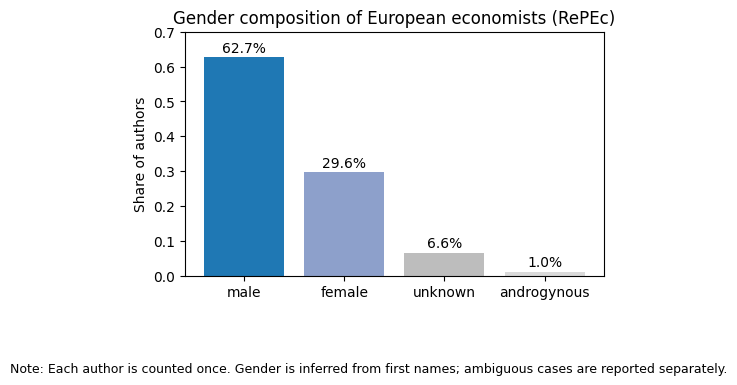

In [ ]:
plt.figure(figsize=(5, 3.2))

bars = plt.bar(
    plot_df["gender"],
    plot_df["share"],
    color=plot_df["gender"].map(color_map)
)

plt.ylabel("Share of authors")
plt.title("Gender composition of European economists (RePEc)")
plt.ylim(0, 0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.015,
        f"{height:.1%}",
        ha="center",
        fontsize=10
    )

plt.figtext(
    0.5,
    -0.18,
    "Note: Each author is counted once. Gender is inferred from first names; ambiguous cases are reported separately.",
    ha="center",
    fontsize=9
)
##
plt.tight_layout()
plt.show()

# Gender x JEL code

In [118]:
jel_labels = {
    "A": "General Economics and Teaching",
    "B": "Schools of Economic Thought and Methodology",
    "C": "Mathematical and Quantitative Methods",
    "D": "Microeconomics",
    "E": "Macroeconomics and Monetary Economics",
    "F": "International Economics",
    "G": "Financial Economics",
    "H": "Public Economics",
    "I": "Health, Education, and Welfare",
    "J": "Labor and Demographic Economics",
    "L": "Industrial Organization",
    "M": "Business Administration and Business Economics",
    "N": "Economic History",
    "O": "Economic Development, Innovation, and Growth",
    "P": "Political Economy and Comparative Economic Systems",
    "Q": "Agricultural and Environmental Economics",
    "R": "Urban, Regional, and Transportation Economics",
    "Y": "Miscellaneous Categories",
    "Z": "Other Special Topics"
}

In [ ]:
jel_gender_counts = (
    df2
    .groupby(["JEL Subject", "gender"])["author_name"]
    .nunique()
    .reset_index(name="n_authors")
)

jel_gender_counts

,JEL Subject,gender,n_authors
0,A,androgynous,12
1,A,female,525
2,A,male,1136
3,A,unknown,78
4,B,androgynous,17
...,...,...,...
71,Y,unknown,17
72,Z,androgynous,16
73,Z,female,702
74,Z,male,1504


In [113]:
jel_gender_shares = (
    jel_gender_counts
    .groupby("JEL Subject", group_keys=False)
    .apply(
        lambda x: x.assign(
            share=x["n_authors"] / x["n_authors"].sum()
        )
    )
)

jel_gender_shares

/tmp/ipykernel_319662/2410783803.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,JEL Subject,gender,n_authors,share
0,A,androgynous,12,0.006853
1,A,female,525,0.299829
2,A,male,1136,0.648772
3,A,unknown,78,0.044546
4,B,androgynous,17,0.010101
...,...,...,...,...
71,Y,unknown,17,0.052469
72,Z,androgynous,16,0.006852
73,Z,female,702,0.300642
74,Z,male,1504,0.644111


In [115]:
jel_gender_table = (
    jel_gender_shares
    .pivot(
        index="JEL Subject",
        columns="gender",
        values="share"
    )
    .fillna(0)
    .reset_index()
)

jel_gender_table

gender,JEL Subject,androgynous,female,male,unknown
0,A,0.006853,0.299829,0.648772,0.044546
1,B,0.010101,0.215092,0.726084,0.048723
2,C,0.012407,0.269517,0.653751,0.064325
3,D,0.011548,0.267568,0.659889,0.060995
4,E,0.012411,0.243115,0.680891,0.063584
5,F,0.011858,0.267101,0.652784,0.068257
6,G,0.014978,0.245443,0.674862,0.064717
7,H,0.008436,0.265084,0.665570,0.060909
8,I,0.014269,0.312298,0.611209,0.062224
9,J,0.010152,0.305370,0.624232,0.060246


In [119]:
female_table = (
    jel_gender_table[["JEL Subject", "female"]]
    .assign(JEL_description=lambda x: x["JEL Subject"].map(jel_labels))
    .sort_values("female", ascending=False)
    .reset_index(drop=True)
)

female_table

gender,JEL Subject,female,JEL_description
0,M,0.358420,Business Administration and Business Economics
1,O,0.319472,"Economic Development, Innovation, and Growth"
2,I,0.312298,"Health, Education, and Welfare"
3,J,0.305370,Labor and Demographic Economics
4,Z,0.300642,Other Special Topics
5,A,0.299829,General Economics and Teaching
6,Q,0.295916,Agricultural and Environmental Economics
7,Y,0.283951,Miscellaneous Categories
8,L,0.273330,Industrial Organization
9,R,0.269831,"Urban, Regional, and Transportation Economics"


In [120]:
female_table["female"] = female_table["female"].map(lambda x: f"{x:.1%}")
female_table

gender,JEL Subject,female,JEL_description
0,M,35.8%,Business Administration and Business Economics
1,O,31.9%,"Economic Development, Innovation, and Growth"
2,I,31.2%,"Health, Education, and Welfare"
3,J,30.5%,Labor and Demographic Economics
4,Z,30.1%,Other Special Topics
5,A,30.0%,General Economics and Teaching
6,Q,29.6%,Agricultural and Environmental Economics
7,Y,28.4%,Miscellaneous Categories
8,L,27.3%,Industrial Organization
9,R,27.0%,"Urban, Regional, and Transportation Economics"


In [122]:
male_table = (
    jel_gender_table[["JEL Subject", "male"]]
    .assign(JEL_description=lambda x: x["JEL Subject"].map(jel_labels))
    .sort_values("male", ascending=False)
    .reset_index(drop=True)
)

male_table["male"] = male_table["male"].map(lambda x: f"{x:.1%}")
male_table

gender,JEL Subject,male,JEL_description
0,B,72.6%,Schools of Economic Thought and Methodology
1,N,69.6%,Economic History
2,E,68.1%,Macroeconomics and Monetary Economics
3,G,67.5%,Financial Economics
4,P,66.6%,Political Economy and Comparative Economic Sys...
5,H,66.6%,Public Economics
6,Y,66.0%,Miscellaneous Categories
7,L,66.0%,Industrial Organization
8,D,66.0%,Microeconomics
9,C,65.4%,Mathematical and Quantitative Methods


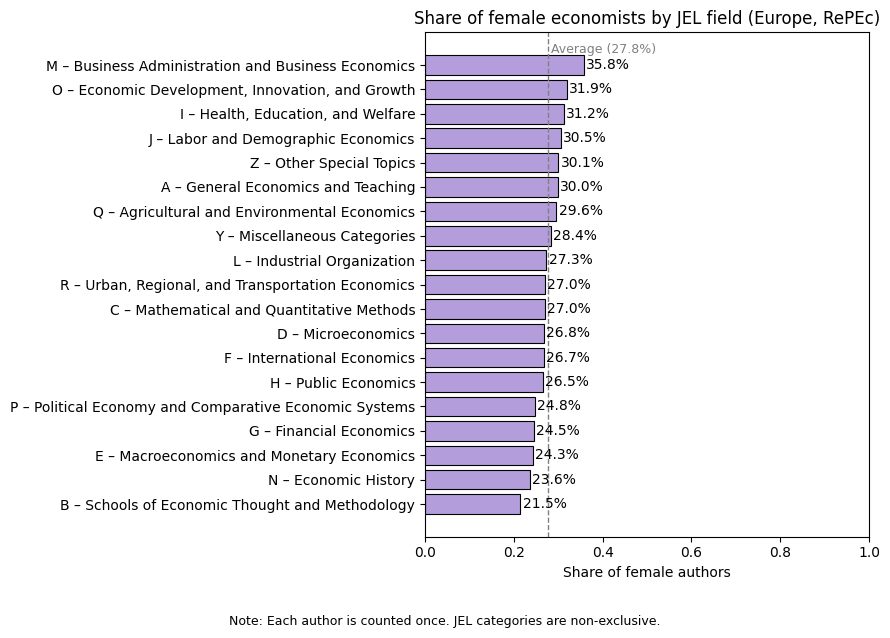

In [146]:
import matplotlib.pyplot as plt

# --- dictionnaire JEL (si pas déjà défini) ---
jel_labels = {
    "A": "General Economics and Teaching",
    "B": "Schools of Economic Thought and Methodology",
    "C": "Mathematical and Quantitative Methods",
    "D": "Microeconomics",
    "E": "Macroeconomics and Monetary Economics",
    "F": "International Economics",
    "G": "Financial Economics",
    "H": "Public Economics",
    "I": "Health, Education, and Welfare",
    "J": "Labor and Demographic Economics",
    "L": "Industrial Organization",
    "M": "Business Administration and Business Economics",
    "N": "Economic History",
    "O": "Economic Development, Innovation, and Growth",
    "P": "Political Economy and Comparative Economic Systems",
    "Q": "Agricultural and Environmental Economics",
    "R": "Urban, Regional, and Transportation Economics",
    "Y": "Miscellaneous Categories",
    "Z": "Other Special Topics"
}

# --- préparation des données ---
plot_df = (
    jel_gender_table[["JEL Subject", "female"]]
    .assign(JEL_description=lambda x: x["JEL Subject"].map(jel_labels))
    .sort_values("female", ascending=True)
    .reset_index(drop=True)
)

# --- graphique ---
plt.figure(figsize=(9, 6))

bars = plt.barh(
    plot_df["JEL Subject"],
    plot_df["female"],
    color="#b39ddb",      # violet doux
    edgecolor="black",    # encadré noir
    linewidth=0.8
)

# Axe y : code + description
plt.yticks(
    range(len(plot_df)),
    [
        f"{j} – {d}"
        for j, d in zip(plot_df["JEL Subject"], plot_df["JEL_description"])
    ]
)

plt.xlabel("Share of female authors")
plt.title("Share of female economists by JEL field (Europe, RePEc)")

# Limites axe x adaptées aux données
plt.xlim(0, 1)

# Annotations en %
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.005,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.1%}",
        va="center",
        fontsize=10
    )
avg_female = plot_df["female"].mean()

plt.axvline(
    avg_female,
    linestyle="--",
    color="grey",
    linewidth=1
)

plt.text(
    avg_female + 0.005,
    len(plot_df) - 0.5,
    f"Average ({avg_female:.1%})",
    color="grey",
    fontsize=9
)

# Note méthodologique
plt.figtext(
    0.5,
    -0.05,
    "Note: Each author is counted once. JEL categories are non-exclusive.",
    ha="center",
    fontsize=9
)
colors = [
    "#6b83b5" if i >= len(plot_df) - 3 else "#8da0cb"
    for i in range(len(plot_df))
]

plt.tight_layout()
plt.show()


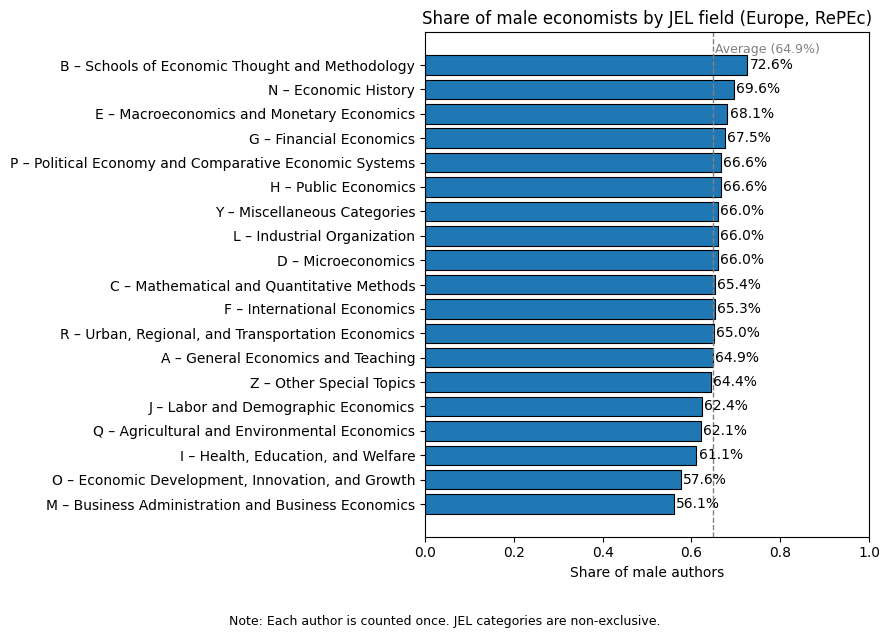

In [148]:
import matplotlib.pyplot as plt

# --- dictionnaire JEL (si pas déjà défini) ---
jel_labels = {
    "A": "General Economics and Teaching",
    "B": "Schools of Economic Thought and Methodology",
    "C": "Mathematical and Quantitative Methods",
    "D": "Microeconomics",
    "E": "Macroeconomics and Monetary Economics",
    "F": "International Economics",
    "G": "Financial Economics",
    "H": "Public Economics",
    "I": "Health, Education, and Welfare",
    "J": "Labor and Demographic Economics",
    "L": "Industrial Organization",
    "M": "Business Administration and Business Economics",
    "N": "Economic History",
    "O": "Economic Development, Innovation, and Growth",
    "P": "Political Economy and Comparative Economic Systems",
    "Q": "Agricultural and Environmental Economics",
    "R": "Urban, Regional, and Transportation Economics",
    "Y": "Miscellaneous Categories",
    "Z": "Other Special Topics"
}

# --- préparation des données ---
plot_df = (
    jel_gender_table[["JEL Subject", "male"]]
    .assign(JEL_description=lambda x: x["JEL Subject"].map(jel_labels))
    .sort_values("male", ascending=True)
    .reset_index(drop=True)
)

# --- graphique ---
plt.figure(figsize=(9, 6))

bars = plt.barh(
    plot_df["JEL Subject"],
    plot_df["male"],
    color="#1f78b4",      # bleu foncé
    edgecolor="black",
    linewidth=0.8
)

# Axe y : code + description
plt.yticks(
    range(len(plot_df)),
    [
        f"{j} – {d}"
        for j, d in zip(plot_df["JEL Subject"], plot_df["JEL_description"])
    ]
)

plt.xlabel("Share of male authors")
plt.title("Share of male economists by JEL field (Europe, RePEc)")

# Limites axe x adaptées aux données
plt.xlim(0,1)

# Annotations en %
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.005,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.1%}",
        va="center",
        fontsize=10
    )
avg_female = plot_df["male"].mean()

plt.axvline(
    avg_female,
    linestyle="--",
    color="grey",
    linewidth=1
)

plt.text(
    avg_female + 0.005,
    len(plot_df) - 0.5,
    f"Average ({avg_female:.1%})",
    color="grey",
    fontsize=9
)

# Note méthodologique
plt.figtext(
    0.5,
    -0.05,
    "Note: Each author is counted once. JEL categories are non-exclusive.",
    ha="center",
    fontsize=9
)
colors = [
    "#6b83b5" if i >= len(plot_df) - 3 else "#8da0cb"
    for i in range(len(plot_df))
]

plt.tight_layout()
plt.show()
